In [1]:
import pandas as pd
import numpy as np
import os
import datetime
os.chdir(r"C:\Users\User\Desktop\분석\yhy\사회취약계층을 위한 도서관 정립\3. 입지선정 군집분석\통합")

In [2]:
df=pd.read_csv("최종.csv",encoding='cp949')

In [3]:
df_1=df[df.LISA_CL == 1]

In [4]:
df_1[['bus_dist','sub_dist','cul_count','park_count','exp','lib_dist','시청각자료_mean','비도서_mean','오디오북_mean']]

,bus_dist,sub_dist,cul_count,park_count,exp,lib_dist,시청각자료_mean,비도서_mean,오디오북_mean
885,480.504655,248.020501,0,9,1.389204e+06,0.000000,0.0,0.0,0.0
937,298.843750,0.000000,0,12,1.418326e+06,1660.425926,0.0,0.0,0.0
938,435.824342,2.523080,0,9,1.864364e+06,1831.000000,0.0,0.0,0.0
992,321.968068,0.000000,0,16,1.288955e+06,1449.504092,0.0,0.0,0.0
993,279.375011,9.232110,0,11,1.822332e+06,1716.126544,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2148,290.263923,153.991150,0,1,1.048992e+06,1409.629794,0.0,0.0,0.0
2204,539.481783,40.145414,0,6,9.796213e+05,1724.259760,0.0,0.0,0.0
2815,492.465110,271.271111,0,19,1.217298e+06,1277.200000,0.0,0.0,0.0
2865,452.044224,200.317487,0,12,1.141854e+06,1513.267257,0.0,0.0,0.0


In [5]:
df_1.drop(columns=['id','POLY_ID','enjoy','nadir','demand','LISA_I','LISA_CL','LISA_P','MORAN_STD','MORAN_LAG'],inplace=True)

c:\users\home\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
df_1.sub_dist.max()

931.790646

In [7]:
df_1.lib_dist.max()

2641.698577

In [8]:
df_1.loc[df_1.sub_dist==0,'sub_dist'] = df_1.sub_dist.max() # 결측값 최대값으로 대체

c:\users\home\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
df_1.loc[df_1.lib_dist==0,'lib_dist'] = df_1.lib_dist.max()

In [10]:
from sklearn.preprocessing import MinMaxScaler # 정규화

scaler = MinMaxScaler()
df2 = scaler.fit_transform(df_1)
df3 = pd.DataFrame(df2, columns=df_1.columns)

geoda 포함

In [11]:
df3

,bus_dist,sub_dist,lib_dist,cul_count,park_count,exp,시청각자료_mean,비도서_mean,오디오북_mean
0,0.411128,0.265266,1.000000,0.0,0.473684,0.149407,0.0,0.0,0.0
1,0.190832,1.000000,0.499833,0.0,0.631579,0.152863,0.0,0.0,0.0
2,0.356946,0.001471,0.586777,0.0,0.473684,0.205783,0.0,0.0,0.0
3,0.218874,1.000000,0.392324,0.0,0.842105,0.137513,0.0,0.0,0.0
4,0.167222,0.008680,0.528224,0.0,0.578947,0.200796,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
139,0.180427,0.164228,0.371999,0.0,0.052632,0.109043,0.0,0.0,0.0
140,0.482649,0.041897,0.532370,0.0,0.315789,0.100813,0.0,0.0,0.0
141,0.425633,0.290250,0.304498,0.0,1.000000,0.129012,0.0,0.0,0.0
142,0.376615,0.214008,0.424824,0.0,0.631579,0.120061,0.0,0.0,0.0


geoda 미포함

In [12]:
# df33=df3.drop(columns=['LISA_I', 'LISA_P', 'MORAN_STD','MORAN_LAG'])

클러스터링 작업

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns   

In [14]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [15]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*', 'd' ,'P', 'p', "2", ">"]
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper left')
    plt.show()
    return cluster_labels
    return dataframe
    
    


In [16]:
SMALL_SIZE = 8 
MEDIUM_SIZE = 15
BIGGER_SIZE = 20


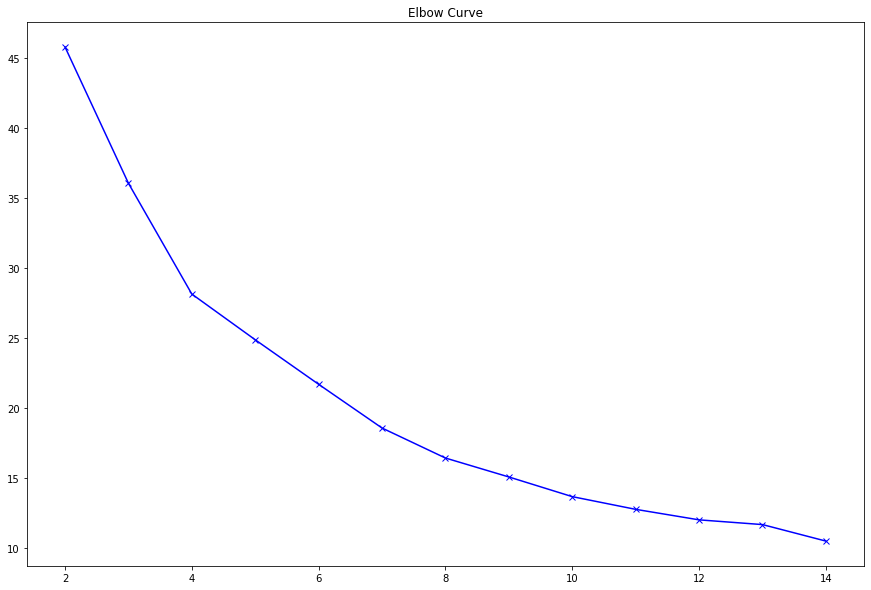

In [17]:
import numpy as np
from scipy.cluster.vq import kmeans, vq
from sklearn.cluster import KMeans

data = np.asarray(df3)
X = data
distortions = []
st = 2
en = 15
for k in range(st, en):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)
    
fig = plt.figure(figsize = (15, 10))
plt.plot(range(st, en),  distortions, 'bx-')
plt.title("Elbow Curve")

plt.rc('axes', titlesize=BIGGER_SIZE) # fontsize of the axes title 
plt.rc('xtick', labelsize=BIGGER_SIZE) # fontsize of the tick labels 
plt.rc('ytick', labelsize=BIGGER_SIZE) # fontsize of the tick labels 

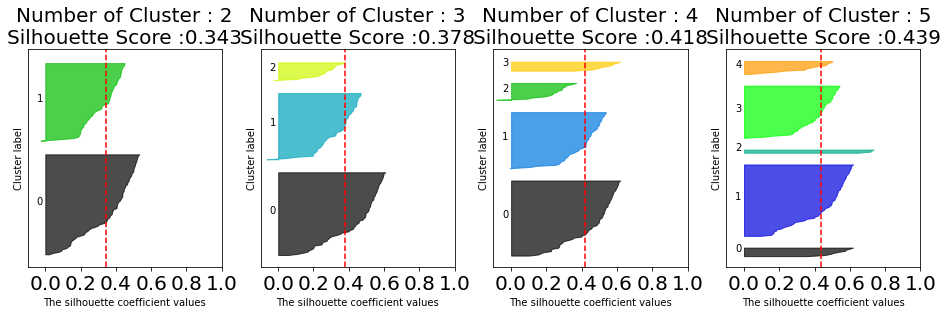

In [18]:
visualize_silhouette([2,3,4,5],df3)

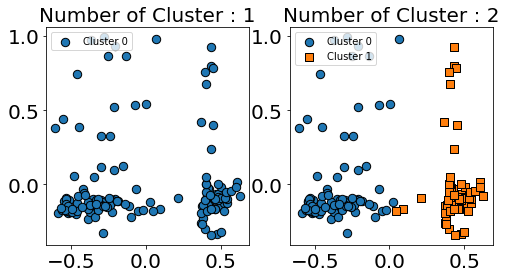

In [19]:
cluster_label1 = visualize_kmeans_plot_multi([1,2],df3)

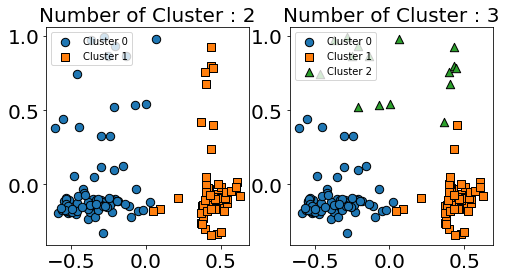

In [20]:
cluster_label2 = visualize_kmeans_plot_multi([2,3],df3)

C:\Users\HOME\AppData\Local\Temp/ipykernel_11524/3082280594.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


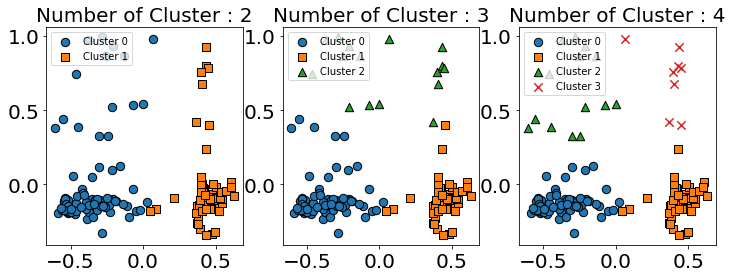

In [21]:
cluster_label3 = visualize_kmeans_plot_multi([2,3,4],df3)

C:\Users\HOME\AppData\Local\Temp/ipykernel_11524/3082280594.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\HOME\AppData\Local\Temp/ipykernel_11524/3082280594.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


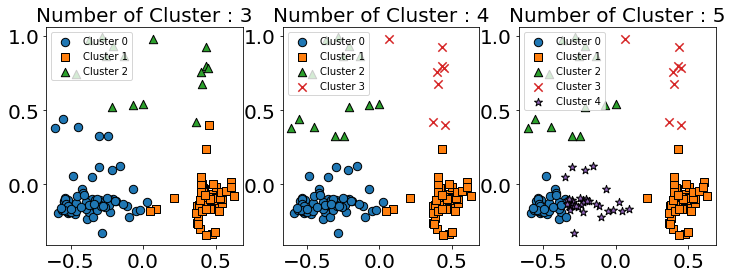

In [22]:
cluster_label4 = visualize_kmeans_plot_multi([3,4,5],df3)

In [30]:
df3['cluster_label']= cluster_label4
df3.head(20)

,bus_dist,sub_dist,lib_dist,cul_count,park_count,exp,시청각자료_mean,비도서_mean,오디오북_mean,cluster_label
0,0.411128,0.265266,1.000000,0.0,0.473684,0.149407,0.0,0.0,0.0,4
1,0.190832,1.000000,0.499833,0.0,0.631579,0.152863,0.0,0.0,0.0,1
2,0.356946,0.001471,0.586777,0.0,0.473684,0.205783,0.0,0.0,0.0,0
3,0.218874,1.000000,0.392324,0.0,0.842105,0.137513,0.0,0.0,0.0,1
4,0.167222,0.008680,0.528224,0.0,0.578947,0.200796,0.0,0.0,0.0,0
5,0.561074,0.688290,0.611288,0.0,0.105263,0.078483,0.0,0.0,0.0,4
6,0.271008,0.379165,0.462576,0.0,0.052632,0.114278,0.0,0.0,0.0,4
7,0.525453,1.000000,1.000000,0.0,0.263158,0.100527,0.0,0.0,0.0,1
8,0.354003,1.000000,0.309216,0.2,0.684211,0.130144,0.0,0.0,0.0,1
9,0.206839,0.024810,0.547193,0.2,0.368421,0.176167,0.0,0.0,0.0,0


In [24]:
df3['cluster_label']= cluster_label3 # 4군집
df33=df3.copy()
df33['cluster_label']= cluster_label4 # 5군집

In [25]:
df3_g = df3.groupby(['cluster_label']).mean().reset_index()
df33_g = df33.groupby(['cluster_label']).mean().reset_index()

In [26]:
df3_g

,cluster_label,bus_dist,sub_dist,lib_dist,cul_count,park_count,exp,시청각자료_mean,비도서_mean,오디오북_mean
0,0,0.299942,0.205440,0.483597,0.100000,0.250399,0.185878,0.013855,0.000000,0.045455
1,1,0.312134,0.983017,0.470224,0.010714,0.359962,0.130701,0.008461,0.011873,0.108189
2,2,0.295920,0.271804,0.327100,0.028571,0.274436,0.156624,0.731525,0.214286,0.018887
3,3,0.258347,0.958999,0.201953,0.025000,0.256579,0.144351,0.792855,0.125000,0.011017


2 4 4 4 1 4 3 4 2 28
1 1 3 1 4 1 4 3 1 19
3 3 2 3 3 3 2 1 3 23
4 2 1 2 2 2 1 2 4 20

In [31]:
df3

,bus_dist,sub_dist,lib_dist,cul_count,park_count,exp,시청각자료_mean,비도서_mean,오디오북_mean,cluster_label
0,0.411128,0.265266,1.000000,0.0,0.473684,0.149407,0.0,0.0,0.0,4
1,0.190832,1.000000,0.499833,0.0,0.631579,0.152863,0.0,0.0,0.0,1
2,0.356946,0.001471,0.586777,0.0,0.473684,0.205783,0.0,0.0,0.0,0
3,0.218874,1.000000,0.392324,0.0,0.842105,0.137513,0.0,0.0,0.0,1
4,0.167222,0.008680,0.528224,0.0,0.578947,0.200796,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
139,0.180427,0.164228,0.371999,0.0,0.052632,0.109043,0.0,0.0,0.0,0
140,0.482649,0.041897,0.532370,0.0,0.315789,0.100813,0.0,0.0,0.0,0
141,0.425633,0.290250,0.304498,0.0,1.000000,0.129012,0.0,0.0,0.0,4
142,0.376615,0.214008,0.424824,0.0,0.631579,0.120061,0.0,0.0,0.0,4


In [29]:
df3=pd.concat([df_1[['enjoy','nadir','POLY_ID','id','LISA_CL']].reset_index(),df3],axis=1)

KeyError: "None of [Index(['enjoy', 'nadir', 'POLY_ID', 'id', 'LISA_CL'], dtype='object')] are in the [columns]"

In [29]:
df3.to_csv("군집.csv",encoding='cp949')

In [30]:
df3_g.to_csv("군집mean.csv",encoding='cp949')

In [25]:
df333_g

,cluster_label,demand,bus_dist,sub_dist,lib_dist,cul_count,park_count,exp,dis_bud_me,old_bud_me,sum_bud_me
0,0,0.175105,0.282357,0.307255,0.438615,0.232000,0.138947,0.242828,0.398823,0.677515,0.677159
1,1,0.112729,0.311084,0.985353,0.391751,0.010811,0.458037,0.135140,0.111984,0.018737,0.054458
2,2,0.164477,0.308888,0.205962,0.465441,0.024138,0.303085,0.153120,0.259075,0.117282,0.184481
3,3,0.106813,0.291700,1.000000,0.499549,0.008333,0.190789,0.124289,0.408164,0.172009,0.280545


In [132]:
df3_g.apply(np.argsort, axis=0)

,cluster_label,enjoy,nadir,demand,bus_dist,sub_dist,lib_dist,cul_count,park_count,exp,dis_bud_me,old_bud_me,sum_bud_me,LISA_I,LISA_P,MORAN_STD,MORAN_LAG
0,0,1,4,4,3,2,2,4,3,2,2,2,2,1,3,4,1
1,1,4,2,2,1,0,1,2,1,4,0,0,0,2,0,2,2
2,2,3,1,1,0,1,3,0,4,0,4,4,4,4,4,1,4
3,3,0,3,3,2,4,0,1,0,1,1,1,1,0,2,3,0
4,4,2,0,0,4,3,4,3,2,3,3,3,3,3,1,0,3


In [ ]:
ranked_list1 = df3_g.apply(np.argsort, axis=1)
ranked_list2 = df33_g.apply(np.argsort, axis=1)